---
jupyter: python3
toc: true
toc-depth: 3
number-sections: true
title: Pandas CheatSheet (지속적으로 업데이트함)
date: 9999-12-31
categories: pandas
author: limyj0708
comments:
  giscus:
    repo: quarto-dev/quarto-docs
format:
    html:
        page-layout: full
---

- " 안 쓰면 잊어버리는, pandas에서의 주요 Dataframe 조작 방법들을 정리"

In [373]:
import pandas as pd
import numpy as np
import copy
from IPython.display import display_html, display

In [374]:
def display_multiple_dfs(dfs:list, styles, margin=10):
    display_target = ''
    for each_df in dfs:
        each_df_html = each_df[0].style.set_caption(f'<b>{each_df[1]}</b>').set_table_styles(styles).set_table_attributes(f"style='display:inline;margin:{margin}px'")._repr_html_()
        display_target += each_df_html
    display_html(display_target, raw = True)

In [375]:
styles = [
    {"selector" : "caption", "props" : "text-align:center; font-size:16px"}
]

# Dataframe 생성

## Dictionary에서 Dataframe 생성

`classmethod DataFrame.from_dict(data, orient='columns', dtype=None, columns=None)`

- data : {field : array-like} or {field : dict}
- orient : {‘columns’, ‘index’, ‘tight’}, default ‘columns’
  - 데이터의 방향. dict의 key가 컬럼이어야 하는 경우, columns를 넘긴다.
  - key가 row여야 한다면, index를 넘긴다.
  - tight라면, key가 ['index', 'columns', 'data', 'index_names', 'column_names']인 dict라고 가정하고 처리한다.
- dtype : dtype, default None
  - 데이터 프레임 구성 후, 강제로 적용할 변수 타입.
- columns : list, default None
  - orient에 index를 넘겼을 때 사용할 컬럼 라벨.
  - orient가 index가 아니면, ValueError가 반환된다.

In [376]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)
# key가 컬럼으로 변환되었따. value로 들어간 리스트가 컬럼의 row 하나하나가 된다.

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [377]:
dict_list = [
    { "id" : 1001001, "address" : "AABCC"}
    ,{ "id" : 2101001, "address" : "BBBDD"}
    ,{ "id" : 3201001, "address" : "백두산"}
    ,{ "id" : 4301001, "address" : "한라산"}
    ,{ "id" : 5401001, "address" : "몰디브"}
] # 같은 key들을 가진 딕셔너리들이 담긴 리스트
pd.DataFrame.from_dict(dict_list) # 이렇게 넣어도, key들이 컬럼이 되어 데이터프레임이 만들어진다.
# 실무적으로는 이 형태를 더 많이 쓰게 된다.

,id,address
0,1001001,AABCC
1,2101001,BBBDD
2,3201001,백두산
3,4301001,한라산
4,5401001,몰디브


## from Nested Dictionary

In [378]:
user_dict = {12: {'Category 1': {'att_1': 1, 'att_2': 'whatever'},
                  'Category 2': {'att_1': 23, 'att_2': 'another'}},
             15: {'Category 1': {'att_1': 10, 'att_2': 'foo'},
                  'Category 2': {'att_1': 30, 'att_2': 'bar'}}}

- dictionary comprehension으로 (인덱스 1, 인덱스 2) : (컬럼명1 : 값1, 컬럼명2 : 값2) 구조의 dictionary를 만든다.
- pandas의 multiindex는 tuple로 구성되어있어서, 이렇게 변환하고 dataframe을 만들면, multiindex를 가진 dataframe이 만들어진다.
- orient = index로 dataframa을 생성할 수 있다.

In [379]:
{(i,j): user_dict[i][j] for i in user_dict.keys() for j in user_dict[i].keys()}

{(12, 'Category 1'): {'att_1': 1, 'att_2': 'whatever'},
 (12, 'Category 2'): {'att_1': 23, 'att_2': 'another'},
 (15, 'Category 1'): {'att_1': 10, 'att_2': 'foo'},
 (15, 'Category 2'): {'att_1': 30, 'att_2': 'bar'}}

In [380]:
pd.DataFrame.from_dict({(i,j): user_dict[i][j] for i in user_dict.keys() for j in user_dict[i].keys()}, orient='index')

att_1     att_2
12 Category 1      1  whatever
   Category 2     23   another
15 Category 1     10       foo
   Category 2     30       bar

## Column만 존재하는 빈 Dataframe을 만들고, 내용 채워 넣기

In [529]:
df = pd.DataFrame(columns=['A','B','BB','C','D'])
# 컬럼들이 될 리스트를 columns parameter에 argument로 넘김
df

,A,B,BB,C,D


In [530]:
df['A'] = [1,3,1]
df

,A,B,BB,C,D
0,1,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN


In [531]:
df['B'] = [4,4,6]
df

,A,B,BB,C,D
0,1,4,NaN,NaN,NaN
1,3,4,NaN,NaN,NaN
2,1,6,NaN,NaN,NaN


In [532]:
df.loc[((df['A'] == 1) & (df['B'] == 4)), 'C'] = 444
df
# 컬럼 값 조건을 걸고 값을 변경

,A,B,BB,C,D
0,1,4,NaN,444,NaN
1,3,4,NaN,NaN,NaN
2,1,6,NaN,NaN,NaN


In [533]:
df.loc[(df['B'] == 4), 'C'] = 0
df
# 컬럼 값 조건을 걸고 값을 변경 2

,A,B,BB,C,D
0,1,4,NaN,0,NaN
1,3,4,NaN,0,NaN
2,1,6,NaN,NaN,NaN


In [534]:
sample_list = [1,2,3,4,5]
# 해당 데이터프레임 가장 아래에 리스트를 row로 넣음
df.loc[len(df)] = sample_list
# 이 방식은 좀 느린 편이며, 데이터프레임에 행을 추가해야 한다면
# 자료를 dictionary로 관리하다가 모든 데이터 추가가 다 끝나고 데이터프레임으로 변환하는 것이 빠름
df

,A,B,BB,C,D
0,1,4,NaN,0,NaN
1,3,4,NaN,0,NaN
2,1,6,NaN,NaN,NaN
3,1,2,3,4,5


# Indexing, 값 변경, 추가

## loc : 라벨 인덱싱

In [535]:
print(type(df.loc[0]))
df.loc[0]
# loc의 첫 번째 인자는 '행 라벨' 이다.
# 그래서 0을 넣으면, index가 0인 행을 series로 반환하고 있다.

<class 'pandas.core.series.Series'>


A       1
B       4
BB    NaN
C       0
D     NaN
Name: 0, dtype: object

In [536]:
print(type(df.loc[0, 'A']))
df.loc[0, 'A']
# 두 번째 인자는 컬럼명이다.

<class 'numpy.int64'>


1

In [537]:
df.loc[[0,1,2,3], ['A','B']]
# 이런 식으로 접근하면, 다중 컬럼과 행을 데이터프레임으로 가져올 수 있다.

,A,B
0,1,4
1,3,4
2,1,6
3,1,2


In [538]:
df.loc[df.index[0:3], ['A','B']]
# df.index로도 접근 가능

,A,B
0,1,4
1,3,4
2,1,6


In [539]:
df.loc[df['B'] == 4]
# row에 값 조건을 걸 수도 있다.

,A,B,BB,C,D
0,1,4,NaN,0,NaN
1,3,4,NaN,0,NaN


In [540]:
df.loc[df['B'] == 4, df.columns.str.contains('B')]
# 컬럼 이름에도 조건을 걸 수 있다. 위의 경우, 컬럼 이름에 B를 포함하는 컬럼만 가져옴.

,B,BB
0,4,NaN
1,4,NaN


In [541]:
df.loc[:,df.columns.str.contains('B')]
# 행 조건 자리에 :를 넣으면, 행에 대해서는 전체를 다 가져오라는 뜻이다.

,B,BB
0,4,NaN
1,4,NaN
2,6,NaN
3,2,3


In [542]:
print(df.columns) # 컬럼명을 가져옴
print(df.columns.str)
print(df.columns.str.contains('B')) # boolean indexing이 가능한 형태가 된다.
print(type(df.columns.str.contains('B'))) # 결과물은 false와 true가 들어간 ndarray
print(df.columns.str.startswith('A')) # 이렇게 하면 A로 시작하는 컬럼을 가져올 수 있음
# 결론은, 다른 외부 함수를 사용해서 어쩄든 boolean 타입 값이 담긴 리스트를 만들면, loc에 넣어서 boolean indexing이 가능하다는 것.

Index(['A', 'B', 'BB', 'C', 'D'], dtype='object')
[False  True  True False False]
<class 'numpy.ndarray'>
[ True False False False False]


In [543]:
df.loc[:,'new'] = 3
df
# loc으로도 기존에 없던 새 컬럼을 추가할 수 있음

,A,B,BB,C,D,new
0,1,4,NaN,0,NaN,3
1,3,4,NaN,0,NaN,3
2,1,6,NaN,NaN,NaN,3
3,1,2,3,4,5,3


In [544]:
df.loc[4] = [1] * len(df.columns)
df.loc[99] = [1] * len(df.columns)
df.loc['cool'] = [22] * len(df.columns)
# dataframe에 행을 추가함. index가 늘어난다.
df

,A,B,BB,C,D,new
0,1,4,NaN,0,NaN,3
1,3,4,NaN,0,NaN,3
2,1,6,NaN,NaN,NaN,3
3,1,2,3,4,5,3
4,1,1,1,1,1,1
99,1,1,1,1,1,1
cool,22,22,22,22,22,22


## iloc : 위치 인덱싱

In [545]:
df.iloc[0:2,0:4]
# 기본적 동작은 loc과 동일하나, 받는 인자가 라벨이 아니고 '위치'다.

,A,B,BB,C
0,1,4,NaN,0
1,3,4,NaN,0


In [546]:
df.iloc[4:7,0:4]
# 위치를 받기 때문에, index는 99여도 5번째 줄로 인식됨

,A,B,BB,C
4,1,1,1,1
99,1,1,1,1
cool,22,22,22,22


In [547]:
df.iloc[7] = [2] * len(df.columns)
# IndexError: iloc cannot enlarge its target object
# 위치를 인자로 받기 때문에, 새로운 컬럼, 행을 만든다거나 하는 행위는 불가능하다.

IndexError: iloc cannot enlarge its target object

## at : 스칼라값 접근

In [549]:
df.at[1,'A']
# 한 번에 1개의 스칼라값에만 접근 가능
# 여러 개의 값에 접근하려고 범위를 지정하면, 에러를 출력한다.
# 단일 값에 접근하는 목적이라면 loc보다 훨씬 빠름

3

In [550]:
df.at[1,'A'] = 100
df
# 값을 딱 하나만 바꾸고 싶다! 라고 하면 at을 활용해보자.

,A,B,BB,C,D,new
0,1,4,NaN,0,NaN,3
1,100,4,NaN,0,NaN,3
2,1,6,NaN,NaN,NaN,3
3,1,2,3,4,5,3
4,1,1,1,1,1,1
99,1,1,1,1,1,1
cool,22,22,22,22,22,22


In [551]:
df.at[99, 'new']
# 그 이외에는 label base인 것이 loc과 똑같음

1

## iat : iloc의 스칼라 버전

In [552]:
df.iat[4,2]
# iloc의 스칼라 버전.
# 이외의 동작은 at과 같다.

1

In [553]:
df.iat[df.index.get_loc('cool'),df.columns.get_loc('new')]
# get_loc을 쓰면, 해당 인덱스와 컬럼의 위치를 반환받을 수 있음.
# 그럼 인덱스와 컬럼의 이름으로도 iat, iloc을 이용 가능

22

## map : Series의 원소 하나하나에 함수 적용
 
- map함수는 DataFrame 타입이 아니라, 반드시 Series 타입에서만 사용해야 한다.
- Series를 한마디로 정의하면 딱 이거다.
    - 값(value) + 인덱스(index) = 시리즈 클래스(Series)
- Series는 NumPy에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 인덱스(index)를 붙일 수 있다. 하지만 데이터 자체는 그냥 값(value)의 1차원 배열이다.
- map함수는 Series의 이러한 값 하나하나에 접근하면서 해당 함수를 수행한다.

In [554]:
import math as m # sqrt 함수 사용을 위해 부름
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
df["map_b"] = df["B"].map(lambda x : m.sqrt(x)) 
# B컬럼의 값 하나하나에 sqrt 함수를 적용한 결과를 map_b 컬럼으로 추가
df

,A,B,BB,C,D,new,map_b
0,1,4,NaN,0,NaN,3,2.000000
1,100,4,NaN,0,NaN,3,2.000000
2,1,6,NaN,NaN,NaN,3,2.449490
3,1,2,3,4,5,3,1.414214
4,1,1,1,1,1,1,1.000000
99,1,1,1,1,1,1,1.000000
cool,22,22,22,22,22,22,4.690416


## apply : 커스텀 함수에 복수 개의 컬럼이 필요하다면
- 커스텀 함수를 사용하기 위해 DataFrame에서 복수 개의 컬럼이 필요하다면, apply 함수를 사용해야 한다.

In [555]:
import math as m # sqrt 함수 사용을 위해 부름
# 두 컬럼의 제곱근의 값을 각각 곱하는 함수
def sqrt_multi(x,y):
    return m.sqrt(x) * m.sqrt(y)

In [556]:
df.loc[:,'new'] = df.apply(lambda x : sqrt_multi(x['A'], x['B']), axis=1) # axis=1 이면 각 열의 원소에 대해 연산 수행
df

,A,B,BB,C,D,new,map_b
0,1,4,NaN,0,NaN,2.000000,2.000000
1,100,4,NaN,0,NaN,20.000000,2.000000
2,1,6,NaN,NaN,NaN,2.449490,2.449490
3,1,2,3,4,5,1.414214,1.414214
4,1,1,1,1,1,1.000000,1.000000
99,1,1,1,1,1,1.000000,1.000000
cool,22,22,22,22,22,22.000000,4.690416


In [557]:
df["apply_bb_d"] = df.apply(lambda x : sqrt_multi(x['BB'], x['B']), axis=1) # axis=1 이면 각 열의 원소에 대해 연산 수행
df # NaN과의 연산은 NaN이 됨을 참고하자.

,A,B,BB,C,D,new,map_b,apply_bb_d
0,1,4,NaN,0,NaN,2.000000,2.000000,NaN
1,100,4,NaN,0,NaN,20.000000,2.000000,NaN
2,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
3,1,2,3,4,5,1.414214,1.414214,2.44949
4,1,1,1,1,1,1.000000,1.000000,1.00000
99,1,1,1,1,1,1.000000,1.000000,1.00000
cool,22,22,22,22,22,22.000000,4.690416,22.00000


## index, columns로 index와 컬럼명 직접 지정

In [558]:
print(df.columns)
print(type(df.columns))
print(df.index)
print(type(df.index))
print(df.columns[2]) # 위치값으로 개별 요소에 접근 가능
print(df.index[6])
df

Index(['A', 'B', 'BB', 'C', 'D', 'new', 'map_b', 'apply_bb_d'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index([0, 1, 2, 3, 4, 99, 'cool'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
BB
cool


,A,B,BB,C,D,new,map_b,apply_bb_d
0,1,4,NaN,0,NaN,2.000000,2.000000,NaN
1,100,4,NaN,0,NaN,20.000000,2.000000,NaN
2,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
3,1,2,3,4,5,1.414214,1.414214,2.44949
4,1,1,1,1,1,1.000000,1.000000,1.00000
99,1,1,1,1,1,1.000000,1.000000,1.00000
cool,22,22,22,22,22,22.000000,4.690416,22.00000


In [559]:
df.columns = ['가', '나', '다', '라', '마', '바', '사', '아'] 
# df.columns에 직접 컬럼명 리스트를 할당하여 컬럼명 변경 가능
# 기존 컬럼 수와 같은 길이의 리스트를 넣지 않으면 오류가 발생함
print(df.columns)
print(type(df.columns))

Index(['가', '나', '다', '라', '마', '바', '사', '아'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [560]:
df.index = [1,2,3,4,5,6,7] 
# df.columns에 직접 컬럼명 리스트를 할당하여 컬럼명 변경 가능
print(df.index)
print(type(df.index))

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>


In [561]:
df

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


## set_index로 index 설정
```DataFrame.set_index(keys, drop=True, append=False, inplace=False)```

- keys에는 index로 할당하고자 하는 열의 레이블을 입력한다.
  - multi-index를 하고 싶으면, ['가', '나'] 이렇게 열 레이블 배열을 입력한다.
- drop : index로 할당한 열을 삭제할까요?
- append : 기존에 존재하던 index를 삭제할까요?
- inplace : 원본 데이터프레임을 변경할까요?

In [562]:
df

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [563]:
df.set_index('가') # 기본값

,나,다,라,마,바,사,아
가,,,,,,,
1,4,NaN,0,NaN,2.000000,2.000000,NaN
100,4,NaN,0,NaN,20.000000,2.000000,NaN
1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
1,2,3,4,5,1.414214,1.414214,2.44949
1,1,1,1,1,1.000000,1.000000,1.00000
1,1,1,1,1,1.000000,1.000000,1.00000
22,22,22,22,22,22.000000,4.690416,22.00000


In [564]:
df.set_index('가', drop=False) # index로 선택된 열 삭제 안 함

,가,나,다,라,마,바,사,아
가,,,,,,,,
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
100,100,4,NaN,0,NaN,20.000000,2.000000,NaN
1,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
1,1,2,3,4,5,1.414214,1.414214,2.44949
1,1,1,1,1,1,1.000000,1.000000,1.00000
1,1,1,1,1,1,1.000000,1.000000,1.00000
22,22,22,22,22,22,22.000000,4.690416,22.00000


In [565]:
df.set_index('가', append=True) # 기존 index 삭제 안 함

,,나,다,라,마,바,사,아
,가,,,,,,,
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [566]:
df.set_index(['가','나']) # 동시에 여러 열을 index로 설정하기

다    라    마          바         사         아
가   나                                               
1   4   NaN    0  NaN   2.000000  2.000000       NaN
100 4   NaN    0  NaN  20.000000  2.000000       NaN
1   6   NaN  NaN  NaN   2.449490  2.449490       NaN
    2     3    4    5   1.414214  1.414214   2.44949
    1     1    1    1   1.000000  1.000000   1.00000
    1     1    1    1   1.000000  1.000000   1.00000
22  22   22   22   22  22.000000  4.690416  22.00000

## reset_index로 index 초기화
```DataFrame.reset_index(drop=False, inplace=False)```

- 기존에 있던 index 대신에, 0부터 시작하여 1씩 늘어나는 정수 index를 추가한다.
- drop : 기존에 index였던 열을 삭제할까요?
- inplace : 원본 데이터프레임을 변경할까요? 

In [567]:
df.reset_index()

,index,가,나,다,라,마,바,사,아
0,1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
1,2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
2,3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
3,4,1,2,3,4,5,1.414214,1.414214,2.44949
4,5,1,1,1,1,1,1.000000,1.000000,1.00000
5,6,1,1,1,1,1,1.000000,1.000000,1.00000
6,7,22,22,22,22,22,22.000000,4.690416,22.00000


In [568]:
df.reset_index(drop=True)

,가,나,다,라,마,바,사,아
0,1,4,NaN,0,NaN,2.000000,2.000000,NaN
1,100,4,NaN,0,NaN,20.000000,2.000000,NaN
2,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
3,1,2,3,4,5,1.414214,1.414214,2.44949
4,1,1,1,1,1,1.000000,1.000000,1.00000
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,22,22,22,22,22,22.000000,4.690416,22.00000


## between
```Series.between(left, right, inclusive='both')```
- left : scalar or list-like
  - Left boundary.
- right : scalar or list-like
  - Right boundary.
- inclusive{“both”, “neither”, “left”, “right”}
  - Include boundaries. Whether to set each bound as closed or open
  - 어느 쪽에 부등호를 지정할 것인가?

In [569]:
dict_sample = [
    {'base_date':np.datetime64('2023-01-03'), 'num':10}
  , {'base_date':np.datetime64('2023-01-03'), 'num':11}
  , {'base_date':np.datetime64('2023-01-04'), 'num':12}
  , {'base_date':np.datetime64('2023-01-06'), 'num':13}
  , {'base_date':np.datetime64('2023-01-07'), 'num':14}
  , {'base_date':np.datetime64('2023-01-08'), 'num':15}
]
df_sample = pd.DataFrame.from_dict(dict_sample)

In [570]:
date_mask = df_sample['base_date'].between(np.datetime64('2023-01-03'), np.datetime64('2023-01-05'), inclusive='left')
df_sample.loc[date_mask]

,base_date,num
0,2023-01-03,10
1,2023-01-03,11
2,2023-01-04,12


In [571]:
# groupby, agg와 함께 사용하면 이렇게 집계 가능
df_sample.loc[date_mask].groupby(by=['base_date']).agg({'num':np.sum})

,num
base_date,
2023-01-03,21
2023-01-04,12


## rename : 인덱스, 컬럼 이름 변경
```DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=None, inplace=False, level=None, errors='ignore')```

- mapper : dict-like or funtion
  - 이름 A를 B로 바꾸는 매핑 정보가 담겨 있는 딕셔너리나, A를 넣으면 B가 반환되는 함수.
- index : dict-like or funtion
  - mapper, axis=0과 index=mapper는 같은 의미이다.
- columns : dict-like or funtion
  - mapper, axis=1과 index=columns는 같은 의미이다.
- axis : {0 or ‘index’, 1 or ‘columns’}, default 0
  - mapper가 타겟하는 axis.
- copy : bool, default True
  - 데이터도 복사한다.
- inplace : bool, default False
  - 새 데이터프레임을 만드는 대신에, 원본을 수정한다.
- level : int or level name, default None
  - multiIndex의 경우, 해당 레벨의 인덱스 이름만 바꾼다.
- errors : {‘ignore’, ‘raise’}, default ‘ignore’
  - If ‘raise’, raise a KeyError when a dict-like mapper, index, or columns contains labels that are not present in the Index being transformed. If ‘ignore’, existing keys will be renamed and extra keys will be ignored.

In [572]:
df2 = copy.deepcopy(df)
df2 = df2.set_index(['가','나'])
df2

다    라    마          바         사         아
가   나                                               
1   4   NaN    0  NaN   2.000000  2.000000       NaN
100 4   NaN    0  NaN  20.000000  2.000000       NaN
1   6   NaN  NaN  NaN   2.449490  2.449490       NaN
    2     3    4    5   1.414214  1.414214   2.44949
    1     1    1    1   1.000000  1.000000   1.00000
    1     1    1    1   1.000000  1.000000   1.00000
22  22   22   22   22  22.000000  4.690416  22.00000

In [573]:
def column_mapper(x):
    if x == '다':
        return 'C'
    elif x == '아':
        return 'H'
    else:
        return x
    
column_mapper2 = {'라':'RARA', '바':'BABA'}

df2_1 = df2.rename(columns=column_mapper)
df2_2 = df2.rename(columns=column_mapper2)

display_multiple_dfs([[df2.rename(columns=column_mapper), 'Mapper로 함수 사용'], [df2_2, 'Mapper로 dict 사용']], styles)

# mapper에 함수를 할당하면, 모든 이름에 대해 다 적용을 한다.
# 함수에서 대상 이름에 대한 로직이 없다면, None으로 들어가게 된다.

Mapper로 함수 사용 
 
 
   
   
 C 
 라 
 마 
 바 
 사 
 H 
 
 
 가 
 나 
   
   
   
   
   
   
 
 
 
 
 1 
 4 
 nan 
 0 
 nan 
 2.000000 
 2.000000 
 nan 
 
 
 100 
 4 
 nan 
 0 
 nan 
 20.000000 
 2.000000 
 nan 
 
 
 1 
 6 
 nan 
 nan 
 nan 
 2.449490 
 2.449490 
 nan 
 
 
 2 
 3 
 4 
 5 
 1.414214 
 1.414214 
 2.449490 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 22 
 22 
 22 
 22 
 22 
 22.000000 
 4.690416 
 22.000000 
 
 
 

 
 Mapper로 dict 사용 
 
 
   
   
 다 
 RARA 
 마 
 BABA 
 사 
 아 
 
 
 가 
 나 
   
   
   
   
   
   
 
 
 
 
 1 
 4 
 nan 
 0 
 nan 
 2.000000 
 2.000000 
 nan 
 
 
 100 
 4 
 nan 
 0 
 nan 
 20.000000 
 2.000000 
 nan 
 
 
 1 
 6 
 nan 
 nan 
 nan 
 2.449490 
 2.449490 
 nan 
 
 
 2 
 3 
 4 
 5 
 1.414214 
 1.414214 
 2.449490 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 22 
 22 
 22 
 22 
 22 
 22.000000 
 4.690416 
 22.000000

In [574]:
index_mapper = {1:'IIII', 22:'TTTT'}

In [575]:
df2_1 = df2.rename(index=index_mapper, level='가')
df2_2 = df2.rename(index=index_mapper, level=0)
display_multiple_dfs([[df2_1, 'level 컬럼 레벨 이름으로 세팅'], [df2_2, 'level 컬럼 레벨 숫자로 세팅']], styles)

level 컬럼 레벨 이름으로 세팅 
 
 
   
   
 다 
 라 
 마 
 바 
 사 
 아 
 
 
 가 
 나 
   
   
   
   
   
   
 
 
 
 
 IIII 
 4 
 nan 
 0 
 nan 
 2.000000 
 2.000000 
 nan 
 
 
 100 
 4 
 nan 
 0 
 nan 
 20.000000 
 2.000000 
 nan 
 
 
 IIII 
 6 
 nan 
 nan 
 nan 
 2.449490 
 2.449490 
 nan 
 
 
 2 
 3 
 4 
 5 
 1.414214 
 1.414214 
 2.449490 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 TTTT 
 22 
 22 
 22 
 22 
 22.000000 
 4.690416 
 22.000000 
 
 
 

 
 level 컬럼 레벨 숫자로 세팅 
 
 
   
   
 다 
 라 
 마 
 바 
 사 
 아 
 
 
 가 
 나 
   
   
   
   
   
   
 
 
 
 
 IIII 
 4 
 nan 
 0 
 nan 
 2.000000 
 2.000000 
 nan 
 
 
 100 
 4 
 nan 
 0 
 nan 
 20.000000 
 2.000000 
 nan 
 
 
 IIII 
 6 
 nan 
 nan 
 nan 
 2.449490 
 2.449490 
 nan 
 
 
 2 
 3 
 4 
 5 
 1.414214 
 1.414214 
 2.449490 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 1 
 1 
 1 
 1 
 1.000000 
 1.000000 
 1.000000 
 
 
 TTTT 
 22 
 22 
 22 
 22 
 22.000000 
 4.690416 
 22.000000

## MultiIndex
  - MultiIndex는 기본적으로 tuple의 형태를 하고 있다.
  - MultiIndex 사용 시, index를 정렬하지 않으면, `PerformanceWarning: indexing past lexsort depth may impact performance.` 경고가 발생한다.
  - sort_index로 index를 정렬해 주어야 한다.

In [585]:
df2 = df2.sort_index()
df2

다    라    마          바         사         아
가   나                                               
1   1     1    1    1   1.000000  1.000000   1.00000
    1     1    1    1   1.000000  1.000000   1.00000
    2     3    4    5   1.414214  1.414214   2.44949
    4   NaN    0  NaN   2.000000  2.000000       NaN
    6   NaN  NaN  NaN   2.449490  2.449490       NaN
22  22   22   22   22  22.000000  4.690416  22.00000
100 4   NaN    0  NaN  20.000000  2.000000       NaN

In [581]:
df2.loc[(1,4),:]

,,다,라,마,바,사,아
가,나,,,,,,
1,4,NaN,0,NaN,2.0,2.0,NaN


### 한 레벨의 index만 가져와서 활용하기

In [584]:
print(df2.index.get_level_values(0))
print(df2.index.get_level_values(1))

Int64Index([1, 1, 1, 1, 1, 22, 100], dtype='int64', name='가')
Int64Index([1, 1, 2, 4, 6, 22, 4], dtype='int64', name='나')


In [589]:
# 첫 번째 레벨의 index가 1인 행을 가져옴
df2.loc[df2.index.get_level_values(0) == 1]

다    라    마         바         사        아
가 나                                            
1 1    1    1    1  1.000000  1.000000  1.00000
  1    1    1    1  1.000000  1.000000  1.00000
  2    3    4    5  1.414214  1.414214  2.44949
  4  NaN    0  NaN  2.000000  2.000000      NaN
  6  NaN  NaN  NaN  2.449490  2.449490      NaN

# 값 삭제, 대체
 - 특정 조건의 값을 삭제하고 싶은 경우에는, 해당 조건의 반대 조건을 걸어서 반환 결과를 사용하는 식으로 처리한다.

## drop : 원하는 행, 열 지우기
```DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')```
 
- 특정 레이블의 행이나 열을 제거한다.
- labels : 제거할 index, 레이블 하나 혹은 리스트 (list-like)
- axis : 0이면 행, 1이면 컬럼 대상
- index : labels, axis=0 대신 사용가능
- columns : labels, axis=1 대신 사용가능
- level : MultiIndex일 경우, 어떤 레벨을 제거할 것인지
- inplace : 원본 변경 할 건가요?
- errors : 'ignore'로 세팅하면, 에러 출력 안 하고 존재하는 레이블만 제거한다.

In [426]:
df

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [427]:
df.drop(labels=['가','아'], axis=1)

,나,다,라,마,바,사
1,4,NaN,0,NaN,2.000000,2.000000
2,4,NaN,0,NaN,20.000000,2.000000
3,6,NaN,NaN,NaN,2.449490,2.449490
4,2,3,4,5,1.414214,1.414214
5,1,1,1,1,1.000000,1.000000
6,1,1,1,1,1.000000,1.000000
7,22,22,22,22,22.000000,4.690416


In [428]:
df.drop(labels=[1,7], axis=0)

,가,나,다,라,마,바,사,아
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000


In [429]:
df.drop(columns=['가','아'])
# df.drop(labels=['가','아'], axis=1)와 같은 결과

,나,다,라,마,바,사
1,4,NaN,0,NaN,2.000000,2.000000
2,4,NaN,0,NaN,20.000000,2.000000
3,6,NaN,NaN,NaN,2.449490,2.449490
4,2,3,4,5,1.414214,1.414214
5,1,1,1,1,1.000000,1.000000
6,1,1,1,1,1.000000,1.000000
7,22,22,22,22,22.000000,4.690416


## Na 대응

### isna : NaN인지 각 값에 대해 확인
- NaN인지 각 값에 대해 확인하여 boolean으로 표현
- isnull() 도 완전히 같은 기능을 한다.
- 왜 같은 기능을 하는 함수가 두 개나 있는지는 아래 링크를 참조
  - [https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)
  - This is because pandas' DataFrames are based on R's DataFrames. In R na and null are two separate things. Read [this post](https://www.r-bloggers.com/2010/04/r-na-vs-null/) for more information. 
    However, in python, pandas is built on top of numpy, **which has neither na nor null values. Instead numpy has NaN values (which stands for "Not a Number").** Consequently, pandas also uses NaN values.
- 완전히 반대의 기능을 하는 함수로 notnull()이 있다.
  - [pandas.notnull(obj)](https://pandas.pydata.org/docs/reference/api/pandas.notnull.html)

In [430]:
df.isna()
# 특정 컬럼, 행에 대해서도 사용 가능

,가,나,다,라,마,바,사,아
1,False,False,True,False,True,False,False,True
2,False,False,True,False,True,False,False,True
3,False,False,True,True,True,False,False,True
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


### dropna : NA 드랍
```DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)```

- axis
  - 0 혹은 'index' : missing value가 있는 행을 드랍
  - 1 혹은 'columns' : missing value가 있는 열을 드랍
- how
  - any : missing value가 하나라도 있으면 드랍
  - all : 전체 값이 다 missing value여야 드랍
- thresh : 문턱값. 정수를 입력 시, 정상값이 해당 정수 갯수만큼은 있어야 제거 안 함
- subset : list-like 오브젝트를 넣으면, 해당 index나 컬럼에서만 missing value 체크
- inplace : 원본 변경 할 건가요?

In [431]:
df

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
3,1,6,NaN,NaN,NaN,2.449490,2.449490,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [432]:
df.dropna() # 기본적으로 행 드랍

,가,나,다,라,마,바,사,아
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [433]:
df.dropna(axis=1) # 열 드랍

,가,나,바,사
1,1,4,2.000000,2.000000
2,100,4,20.000000,2.000000
3,1,6,2.449490,2.449490
4,1,2,1.414214,1.414214
5,1,1,1.000000,1.000000
6,1,1,1.000000,1.000000
7,22,22,22.000000,4.690416


In [434]:
df.dropna(thresh=5) # index 3인 행은 정상값이 4개였음

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


In [435]:
df.dropna(axis=0, subset=['라']) # '라'열만 검사해서 NaN이 있는 행을 제거함

,가,나,다,라,마,바,사,아
1,1,4,NaN,0,NaN,2.000000,2.000000,NaN
2,100,4,NaN,0,NaN,20.000000,2.000000,NaN
4,1,2,3,4,5,1.414214,1.414214,2.44949
5,1,1,1,1,1,1.000000,1.000000,1.00000
6,1,1,1,1,1,1.000000,1.000000,1.00000
7,22,22,22,22,22,22.000000,4.690416,22.00000


### fillna : NaN 데이터 대체하기
`DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)`

- value : NaN을 무엇으로 채울 것인가?
  - scalar : 0, 1 따위의 값을 넣음
  - dict : {"A": 0, "B": 1, "C": 2, "D": 3}
    - 컬럼 A의 NaN은 0으로, 컬럼 B의 NaN은 1로, 컬럼 C의 NaN은 2로, 컬럼 D의 NaN은 3으로 대체
  - dataframe : 대체 대상 dataframe와 같은 크기의 dataframe을 준비한 후, value에 dataframe을 넣으면 NaN 값만 넣은 dataframe의 값으로 대체된다. 컬럼명이나 인덱스는 원본 dataframe의 것이 유지된다.
- method : 어떤 방법으로 채울까? (value와 같이 사용할 수 없음)
  - backfill, bfill : NaN의 다음 값으로 NaN 채우기.
  - ffill, pad : NaN의 직전 값으로 NaN 채우기.
- axis
  - 0 혹은 'index'
  - 1 혹은 'columns'
- inplace : 원본 변경 할 건가요?
- limit : 위에서부터 NaN 몇 개만 바꿀래? 기본값 None이면 모든 NaN을 바꾸는 것.

In [436]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [437]:
df.fillna(value=0) # 0으로 NaN 채우기

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [438]:
df.fillna(method='ffill') # NaN의 직전 값으로 NaN 채우기. 'pad'를 써도 마찬가지

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [439]:
df.fillna(method='bfill') # NaN의 다음 값으로 NaN 채우기. 'backfill'을 써도 마찬가지

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [440]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values) # values에 dictionary를 넣어서 컬럼마다 NaN을 다른 값으로 대체

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [441]:
df.fillna(value=values, limit=1) # limit=1이어서, 최초의 NaN 하나만 대체

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,NaN,1
2,NaN,1.0,NaN,5
3,NaN,3.0,NaN,4


In [442]:
df2 = pd.DataFrame(np.zeros((4, 4)), columns=list("ABCE"))
df2 # 4 by 4 영행렬을 만들어 보자

,A,B,C,E
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [443]:
df.fillna(df2) #원본 df의 컬럼이 유지됨

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [444]:
df.loc[:,'A'].fillna(df.loc[:,'A'].mean()) # A열의 NaN 값을 A열의 평균으로 채움

0    3.0
1    3.0
2    3.0
3    3.0
Name: A, dtype: float64

## drop_duplicates : 중복값 제거

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

- subset : 컬럼 라벨, 혹은 컬럼 라벨 리스트
  - 넣은 특정 컬럼만 중복값을 체크함. 기본으로는 전체 컬럼의 값이 다 같아야 제거
- keep
  - first : 첫 번째 등장한 것을 제외하면 다 제거
  - last : 마지막에 등장한 것을 제외하면 다 제거
  - False : 몽땅 다 제거
- inplace : 원본 변경 할 건가요?
- ignore_index : True 값을 넣으면, 결과값의 인덱스를 0, 1, ... n-1로 라벨링함

In [445]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [446]:
df.drop_duplicates() # 모든 열의 값이 다 같으면 제거

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [447]:
df.drop_duplicates(subset=['brand']) # brand 컬럼 하나에서만 값이 같아도 제거

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [448]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')
# brand, style 모두 같으면, 마지막 값만 남김

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


# Dataframe 결합

## 위아래로 붙이는 단순 결합의 경우, 어떤 방식이 가장 빠른가?
- 결론부터 말하자면 데이터를 Dictionary의 리스트로 관리하다가 마지막에 Dataframe으로 만드는 것이 가장 빠르다.
  - [https://stackoverflow.com/questions/57000903/what-is-the-fastest-and-most-efficient-way-to-append-rows-to-a-dataframe](https://stackoverflow.com/questions/57000903/what-is-the-fastest-and-most-efficient-way-to-append-rows-to-a-dataframe)
  ```Python
    start_time = time.time()
    dictinary_list = []
    for i in range(0, end_value, 1):
        dictionary_data = {k: random.random() for k in range(30)}
        dictionary_list.append(dictionary_data)

    df_final = pd.DataFrame.from_dict(dictionary_list)

    end_time = time.time()
    print('Execution time = %.6f seconds' % (end_time-start_time))
  ```
  
  - 그럼 리스트 합치는 건 뭐가 제일 빠르지?
    - [https://www.realpythonproject.com/day15-the-fastest-way-to-combine-lists-in-python/](https://www.realpythonproject.com/day15-the-fastest-way-to-combine-lists-in-python/)
    - append() is the fastest but it doesn’t combine the elements of both the lists. **The + operator seems to be the ideal option.** However, this has been done on a comparatively smaller dataset and results may vary when you try it on your own.
- 인생은 항상 원하는대로 흘러가지 않기에, 다른 방법도 알아보자.

### concat
`pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)`

In [449]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2]) # Series 두 개 합치기

0    a
1    b
0    c
1    d
dtype: object

In [450]:
pd.concat([s1, s2], ignore_index=True) # 합치면서 index 새로 만들어줌

0    a
1    b
2    c
3    d
dtype: object

In [451]:
s3 = pd.concat([s1, s2], keys=['s1', 's2']) # 최외각 레벨에 새로운 index를 만들어줌
print(s3)
print(s3['s1']) 
print(s3['s2'][0]) # 이렇게 조회가능

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object
0    a
1    b
dtype: object
c


In [452]:
s3 = pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID'])
# index에 이름 붙이기
print(s3)
print(s3.index)
print(s3.index.names)

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object
MultiIndex([('s1', 0),
            ('s1', 1),
            ('s2', 0),
            ('s2', 1)],
           names=['Series name', 'Row ID'])
['Series name', 'Row ID']


In [453]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
print(df1)
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
print(df2)
pd.concat([df1, df2]) # Dataframe 합치기

  letter  number
0      a       1
1      b       2
  letter  number
0      c       3
1      d       4


,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [454]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
print(df3)
pd.concat([df1, df3], sort=False) # 한 쪽에 없는 컬럼의 값은 NaN으로 삽입됨

  letter  number animal
0      c       3    cat
1      d       4    dog


,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [455]:
pd.concat([df1, df3], join="inner") # join="inner"로 하면 양쪽에 다 있는 컬럼만 합쳐서 반환함

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [456]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1) # axis=1이면 컬럼을 붙임

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [457]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george'], ['dog', 'sam']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1) 
# axis=1이면 컬럼을 붙임
# 행의 수가 다르면, 행이 적은 쪽에 NaN이 삽입된 행이 추가됨

,letter,number,animal,name
0,a,1.0,bird,polly
1,b,2.0,monkey,george
2,NaN,NaN,dog,sam


In [458]:
df5 = pd.DataFrame([1], index=['a'])
df6 = pd.DataFrame([2], index=['a'])
pd.concat([df5, df6], verify_integrity=True)
# verify_integrity=True를 하면, index가 같은 것을 허용하지 않음.

ValueError: Indexes have overlapping values: Index(['a'], dtype='object')

## Merge : Database의 Join처럼 Dataframe 합치기
`DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)`

- right : 합칠 Dataframe
- how : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
  - left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
  - right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
  - outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
  - inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
  - cross: creates the cartesian product from both frames, preserves the order of the left keys.
- on : label or list
  - 조인할 컬럼이나 인덱스 레벨의 이름. 두 Dataframe에 무조건 있어야 한다.
- left_on : label or list, or array-like
  - 왼쪽 Dataframe의 조인할 컬럼이나 인덱스 레벨의 이름.
- right_on : label or list, or array-like
  - 오른쪽 Dataframe의 조인할 컬럼이나 인덱스 레벨의 이름.
- left_index : bool, default False
  - 왼쪽 index를 조인의 key로 사용할까요?
  - MultiIndex인 경우, 상대 Dataframe의 key 수가 level의 수와 동일해야 함.
- right_index : bool, default False
  - 오른쪽 index를 조인의 key로 사용할까요?
  - MultiIndex인 경우, 상대 Dataframe의 key 수가 level의 수와 동일해야 함.
- sort : bool, default False
  - 조인 결과 Dataframe에서 key를 사전 순서(lexicographically)로 배열함
  - False인 경우, 조인 방법에 정의된 방법을 따라감
- suffixes : list-like, default is (“_x”, “_y”)
  - 컬럼에 접미사를 붙인다. 왼쪽 오른쪽 구분용.
  - 기본적으로 왼쪽에 _x, 오른쪽에 _y가 붙는다.
- copy : bool, default True
  - False면, 가능하면 복사를 피한다.
- indicator : bool or str, default False
- validate : str, optional
  - If specified, checks if merge is of specified type.
      - “one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets.
      - “one_to_many” or “1:m”: check if merge keys are unique in left dataset.
      - “many_to_one” or “m:1”: check if merge keys are unique in right dataset.
      - “many_to_many” or “m:m”: allowed, but does not result in checks.

In [459]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'], 'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'], 'value': [5, 6, 7, 8]})
display_multiple_dfs([[df1, ''], [df2, '']], styles)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [460]:
df_x = df1.merge(df2, left_on='lkey', right_on='rkey')
# 뒤에 _x, _y가 붙은 것을 확인.
df_suffix = df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))
# _left, _right로 바꿔 보았음
display_multiple_dfs([[df_x, ''], [df_suffix, '']], styles)

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7
,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5


In [461]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
display_multiple_dfs([[df1, ''], [df2, '']], styles)

,a,b
0,foo,1
1,bar,2
,a,c
0,foo,3
1,baz,4


In [462]:
df1.merge(df2, how='inner', on='a')
# a 컬럼을 키로 잡음. 두 Dataframe에 다 a 컬럼이 있어서 가능한것
# inner join

,a,b,c
0,foo,1,3


In [463]:
df1.merge(df2, how='left', on='a')
# left outer join

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [464]:
df1.merge(df2, how='left', left_on='a', right_on='a')
# left outer join

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


### Dataframe Join의 속도를 향상시키기 위해서는?

- [https://stackoverflow.com/questions/40860457/improve-pandas-merge-performance](https://stackoverflow.com/questions/40860457/improve-pandas-merge-performance)
- key를 index로 사용한다.
  - index 검색 시에는 hash table을 이용하기 때문
  - A short explanation why it is faster to merge by index instead of by a "normal" column: Indices have a hash table. Meaning you can look them up in amortized O(1). For a normal column you need O(n) in worst case, meaning merging two dfs with len n takes O(n^2) in worst case.
- join을 쓴다.
- concat을 쓴다.

**여기서의 결론** : key를 index로 사용한 후 join을 쓴다.

In [465]:
import random
df1 = pd.DataFrame({'uid_sample': random.sample(range(100000), 80000), 'value': random.sample(range(10000000), 80000)})
df2 = pd.DataFrame({'userId_sample2': random.sample(range(100000), 80000), 'value': random.sample(range(10000000), 80000)})
# 80000명의 정보를 담고 있는 두 Dataframe이 있다고 하자.
# uid_sample, userId_sample2를 key로 조인하고 싶다.

In [466]:
%%timeit
df1.merge(df2, how='left', left_on='uid_sample', right_on='userId_sample2')

8.07 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [467]:
%%timeit
# key로 사용하려는 컬럼을 index로 할당
# 10%정도 빨라졌다.
df3 = df1.set_index('uid_sample')
df4 = df2.set_index('userId_sample2')
df3.merge(df4, right_index=True, left_index=True)

7.09 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [468]:
%%timeit
# key로 사용하려는 컬럼을 index로 할당
# join 함수 사용
# 여기서 이미 3배 빨라졌다
df3 = df1.set_index('uid_sample')
df4 = df2.set_index('userId_sample2')
df3.join(df4, how='left', lsuffix='left', rsuffix='right')

2.54 ms ± 72.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [469]:
%%timeit
# inner, outer밖에 안 되는데 join보다 느리다.
df3 = df1.set_index('uid_sample')
df4 = df2.set_index('userId_sample2')
pd.concat([df3, df4], axis=1, join='inner')

6.79 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Join : Merge보다 빠르다
`DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)`

- other : 다른 데이터프레임, 혹은 시리즈, 혹은 데이터프레임 리스트
  - 함수를 호출한 데이터프레임에 붙일 대상
- on : 조인 키가 될 컬럼 이름, 혹은 컬럼 이름 리스트(array-like 자료형이면 됨)
- how
  - left : 함수를 호출한 데이터프레임(caller)의 index를 조인 키로 사용. on에서 컬럼을 지정했을 경우, 그 컬럼을 사용
  - right : other 패러미터에 할당된 객체의 index를 사용
  - outer : outer join 실행 후, 사전 순으로 정렬함. 기본적으론 양쪽 다 index를 사용. on에서 지정하면 caller만 해당 컬럼 사용.
  - inner : inner join 실행. caller의 순서 보존됨.
  - cross : 양쪽의 곱집합 생성. left key(caller)의 순서 보존됨.
- lsuffix, rsuffix : join된 결과물 컬럼의 접미사 세팅.
- sort : TRUE면, join key의 사전 순서대로 정렬됨. FALSE면, how에서의 기본 처리방식을 따름.

In [478]:
caller = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'], 'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'B': ['B0', 'B1', 'B2']})
other2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'C': ['C0', 'C1', 'C2']})

In [479]:
display_multiple_dfs([[caller, 'caller'], [other, 'other'], [other2, 'other2']], styles)

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5
,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [480]:
# 이러면 index 0,1,2,3,4,5 기준으로 join됨
caller.join(other, lsuffix='_caller', rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [481]:
# set_index로 조인 키로 쓰고 싶은 컬럼을 index로 만들어주는 방법이 있음
caller.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [482]:
# 혹은, other만 조인 키로 쓰고 싶은 컬럼을 index로 만들어 주고,
# on에다 조인 키로 쓰고 싶은 caller의 컬럼을 할당하는 방법이 있음
caller.join(other.set_index('key'), on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [483]:
# 한 번에 여러 개의 Dataframe을 Join 할 때에는, index로 join하는 것만 지원한다.
# 즉, on을 쓰지 못한다는 이야기이다.
caller.set_index('key').join([other.set_index('key'), other2.set_index('key')])

,A,B,C
key,,,
K0,A0,B0,C0
K1,A1,B1,C1
K2,A2,B2,C2
K3,A3,NaN,NaN
K4,A4,NaN,NaN
K5,A5,NaN,NaN


# 데이터 구조 변경

## Pivot : 엑셀에서 보던 그것
`DataFrame.pivot(index=None, columns=None, values=None)`

- index : str or object or a list of str, optional
  - 새로운 프레임의 index로 사용할 컬럼
- columns : str of object or a list of str
  - 새로운 프레임의 컬럼으로 사용할 컬럼
- values : str, object or a list of the previous, optional
  - 새로운 프레임의 값을 계산하기 위해 사용하는 컬럼
  - 지정하지 않으면, 남아있는 모든 컬럼을 사용한다.

In [484]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [485]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [486]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [487]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [488]:
df = pd.DataFrame({
       "lev1": [1, 1, 1, 2, 2, 2],
       "lev2": [1, 1, 2, 1, 1, 2],
       "lev3": [1, 2, 1, 2, 1, 2],
       "lev4": [1, 2, 3, 4, 5, 6],
       "values": [0, 1, 2, 3, 4, 5]})
df

,lev1,lev2,lev3,lev4,values
0,1,1,1,1,0
1,1,1,2,2,1
2,1,2,1,3,2
3,2,1,2,4,3
4,2,1,1,5,4
5,2,2,2,6,5


In [489]:
df.pivot(index="lev1", columns=["lev2", "lev3"] ,values="values")
# Multilevel Column
# 해당하는 조건에 맞는 값이 없으면 NaN이 들어가게 됨

lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

In [490]:
df.pivot(index=["lev1", "lev2"], columns=["lev3"],values="values")
# Multiindex

lev3         1    2
lev1 lev2          
1    1     0.0  1.0
     2     2.0  NaN
2    1     4.0  3.0
     2     NaN  5.0

In [491]:
#collapse-output
df.pivot(index=["lev1"], columns=["lev2"],values="values")
# 인덱스, 컬럼 쌍에 중복이 발생하면 에러가 출력됨
# ValueError: Index contains duplicate entries, cannot reshape

ValueError: Index contains duplicate entries, cannot reshape

## Pivot_table : Pivot의 확장 버전

`pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)`

In [492]:
#hide_input
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [493]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
table # aggfunc에 집계함수를 넣게 된다. 여기서는 총합

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [494]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)
table # fill_value에 할당된 값으로 NaN을 대체하게 됨

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [495]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': np.sum})
table # aggfunc에 Dictionary를 할당하여 값마다 집계함수를 각각 다르게 설정할 수 있다.

D   E
A   C                  
bar large  5.500000  15
    small  5.500000  17
foo large  2.000000   9
    small  2.333333  13

In [496]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
table # 한 값에 여러 개의 집계함수 할당도 가능하다.

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2

In [497]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': np.mean},
                    margins=True, margins_name="mean")
table # Values에 적용된 집계함수를 컬럼 전체에 적용한 행을 추가한다.
# 한 Value에 집계함수를 하나만 사용했을 때 적용 가능.
# margins_name을 지정하지 않으면 기본적으로 행 Index 이름은 All이 된다.

D         E
A    C                        
bar  large  5.500000  7.500000
     small  5.500000  8.500000
foo  large  2.000000  4.500000
     small  2.333333  4.333333
mean        3.666667  6.000000

## melt : Unpivot 하기

`pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)`

- id_vars : tuple, list, or ndarray, optional
  - 식별자로 사용할 컬럼
- value_vars : tuple, list, or ndarray, optional
  - Unpivot 할 컬럼. 지정하지 않으면, id_vars에 할당되지 않은 모든 컬럼을 사용

In [498]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [499]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [500]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [501]:
pd.melt(df, id_vars=['A'], value_vars=['B'],
        var_name='myVarname', value_name='myValname')
# 이름은 커스터마이징 가능

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [502]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], ignore_index=False)
# 원본 index 유지

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
0,a,C,2
1,b,C,4
2,c,C,6


## sort_values : 정렬
`DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)`

- by : str, 혹은 str의 리스트
- axis : {0 or ‘index’, 1 or ‘columns’}, default 0
- ascending : bool, default True, True일 경우 오름차순
- inplace : bool, default False, 원본을 변경하는지
- kind : {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, default ‘quicksort’
  - 정렬 알고리즘 종류. 자세한 사항은 [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html#numpy.sort) 참고
- na_position : {‘first’, ‘last’}, default ‘last’, NaN의 위치는 어디에 둘 지 선택
- ignore_index : bool, default False, If True, the resulting axis will be labeled 0, 1, …, n - 1.
- key : callable, optional
  - 정렬하기 전에 key에 할당된 함수를 값에 적용한다.
  - by에 할당된 컬럼들에 각각 적용된다.
  - input과 output의 크기가 같을 것이 요구된다. (정렬을 해야 하니, 당연한 이야기지만)
    - It should expect a Series and return a Series with the same shape as the input.

In [503]:
df_sample = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df_sample

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [504]:
df_sample.sort_values(by=['col1'])
# col1 기준 정렬

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [505]:
df_sample.sort_values(by=['col1', 'col2'])
# col1, col2 기준 정렬

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [506]:
df_sample.sort_values(by='col1', ascending=False, na_position='first')
# col1 기준, 내림차순, NaN을 상단에 두고 정렬

,col1,col2,col3,col4
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B


In [507]:
col4 = df_sample.sort_values(by='col4')
#col4를 그냥 정렬하면, 대문자에서 소문자 순서로 정렬된다.
col4

,col1,col2,col3,col4
1,A,1,1,B
3,NaN,8,4,D
5,C,4,3,F
0,A,2,0,a
2,B,9,9,c
4,D,7,2,e


In [508]:
col4_key_lowercase = df_sample.sort_values(by='col4', key = lambda col: col.str.lower())
# col4의 각 알파벳들을 다 소문자로 치환 후 정렬하였다.
col4_key_lowercase

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


## shift : Bigquery의 lead, lag에 대응되는 함수

In [509]:
df_sample = pd.DataFrame({
    'base_date': [  np.datetime64('2023-01-12')
                      , np.datetime64('2023-01-12')
                      , np.datetime64('2023-01-12')
                      , np.datetime64('2023-01-12')
                      , np.datetime64('2023-01-13')
                      , np.datetime64('2023-01-13')
                      
    ],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df_sample

,base_date,col2,col3,col4
0,2023-01-12,2,0,a
1,2023-01-12,1,1,B
2,2023-01-12,9,9,c
3,2023-01-12,8,4,D
4,2023-01-13,7,2,e
5,2023-01-13,4,3,F


In [510]:
df_sample['col2_shift_lag1'] = df_sample.groupby(['base_date'])['col2'].shift(1)
# base_date를 기준으로, col2에 대하여 shift 1 적용
# 즉, 이전 행의 col2 값을 출력

df_sample['col2_shift_lead1'] = df_sample.groupby(['base_date'])['col2'].shift(-1)
# base_date를 기준으로, col2에 대하여 shift -1 적용
# 즉, 다음 행의 col2 값을 출력

In [511]:
df_sample

,base_date,col2,col3,col4,col2_shift_lag1,col2_shift_lead1
0,2023-01-12,2,0,a,NaN,1.0
1,2023-01-12,1,1,B,2.0,9.0
2,2023-01-12,9,9,c,1.0,8.0
3,2023-01-12,8,4,D,9.0,NaN
4,2023-01-13,7,2,e,NaN,4.0
5,2023-01-13,4,3,F,7.0,NaN


# 데이터 타입

## dtypes : 컬럼들의 type 출력

In [512]:
df = pd.DataFrame({'float': [1.0],
                   'int': [1],
                   'datetime': [pd.Timestamp('20180310')],
                   'string': ['foo']})
df.dtypes
# 더 이상의 설명은 필요 없다!

float              float64
int                  int64
datetime    datetime64[ns]
string              object
dtype: object

## select_dtypes : 특정 타입의 컬럼을 선택, 혹은 배제

`DataFrame.select_dtypes(include=None, exclude=None)`

- To select all numeric types, use np.number or 'number'
- To select strings you must use the object dtype, but note that this will return all object dtype columns See the numpy dtype hierarchy
- To select datetimes, use np.datetime64, 'datetime' or 'datetime64'
- To select timedeltas, use np.timedelta64, 'timedelta' or 'timedelta64'
- To select Pandas categorical dtypes, use 'category'
- To select Pandas datetimetz dtypes, use 'datetimetz' (new in 0.20.0) or 'datetime64[ns, tz]'

In [513]:
df = pd.DataFrame({'a': [1, 2] * 3,
                   'b': [True, False] * 3,
                   'c': [1.0, 2.0] * 3})
df

,a,b,c
0,1,True,1.0
1,2,False,2.0
2,1,True,1.0
3,2,False,2.0
4,1,True,1.0
5,2,False,2.0


In [514]:
df.select_dtypes(include='bool')

,b
0,True
1,False
2,True
3,False
4,True
5,False


In [515]:
df.select_dtypes(include=['float64'])

,c
0,1.0
1,2.0
2,1.0
3,2.0
4,1.0
5,2.0


In [516]:
df.select_dtypes(exclude=['int64'])

,b,c
0,True,1.0
1,False,2.0
2,True,1.0
3,False,2.0
4,True,1.0
5,False,2.0


## 6-3. astype : 타입 변경. Bigquery에 df 업로드 시 반드시 사용
`DataFrame.astype(dtype, copy=True, errors='raise')`

- copy : False를 하면, 복사를 하는 게 아니고 원본에 연결되므로 변경사항이 원본에까지 전파됨
- errors : ignore로 세팅하면, 에러 발생 시 원본을 반환하고 끝냄

In [517]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [518]:
df.astype({'col1': 'int32'}).dtypes
# 잘 변경됐습니다~

col1    int32
col2    int64
dtype: object

# 데이터 집계

## groupby : agg
- {컬럼명 : 집계함수} 구조의 dictionary를 변수로 주면, 각 컬럼마다 할당된 집계함수로 집계한다.
    - 집계함수는 커스텀 함수를 사용해도 됨. 아래 코드처럼.

In [519]:
df = pd.DataFrame({
    'month': ['10월', '10월', '10월', '10월', '11월', '12월', '12월'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})

def mean_and_sqrt(x): # 이런 묘한 출력값이 필요한 상황이 있다고 치자.
        return np.sqrt(np.mean(x))
    
df.groupby(by=['month','fruits']).agg({'price':mean_and_sqrt, 'quantity':np.sum})

price  quantity
month fruits                     
10월   apple   10.000000         1
      banana  16.583124         7
      orange  14.142136         2
11월   apple   12.247449         5
12월   apple   14.142136         6
      banana  20.000000         7

- 데이터 집계 방식 중, 가장 범용성이 좋고, 함수화하기도 편한 방식이었다.

- 실제로 사용했던 예시

In [ ]:
agg_dict = {key:np.sum for key in target_column} # 전부 집계함수 sum으로 세팅
agg_dict['accountId'] = 'count' # accountId 수만 count로 세팅. accountId 수를 센다.

ready_for_stacked = for_stackbar.groupby(by=['log_cate']).agg(agg_dict) # 집계 적용

### by에 아무 컬럼도 할당 안 하고 싶으면 어떻게 해야 할까? (전체총합)

In [527]:
df.groupby(lambda x: 'total').agg({'quantity':'sum'})

,quantity
total,28


### 그룹 별로 랜덤 샘플 추출하기
`DataFrameGroupBy.sample(n=None, frac=None, replace=False, weights=None, random_state=None)[source]`
- n : int, optional. 각 그룹 별로 몇 개씩 뽑을지. frac과 동시에 사용할 수 없음. replace가 True가 아니라면, 가장 작은 그룹의 크기보다 클 수 없음.
- frac : float, optional. 각 그룹 별로 추출할 비율. 0 ~ 1 사이의 값을 넣는다.
- replace : bool, default False. 같은 행을 다시 뽑을 수 있는지. True or False
- weights : list-like, optional. 가중치. 기본값 None이면 확률 가중은 모두 같다. 대상 Dataframe의 길이와 같은 길이의 list-like 객체를 할당하면, 각 그룹을 정규화 한 후 샘플링 확률로 사용한다. 각 값들은 음수이면 안 되며, 각 그룹마다 최소 하나의 양수가 있어야 한다.
- random_state : int, array-like, BitGenerator, np.random.RandomState, np.random.Generator, optional. int, 배열형 또는 BitGenerator인 경우 난수 생성용 시드로 쓴다. np.random.RandomState 또는 np.random.Generator인 경우, 그대로 사용한다.

In [591]:
df_sample = pd.DataFrame({"a": ["red"] * 2 + ["blue"] * 2 + ["black"] * 2, "b": range(6)})
df_sample

,a,b
0,red,0
1,red,1
2,blue,2
3,blue,3
4,black,4
5,black,5


#### 같은 비율로 추출

In [594]:
df_sample.groupby("a").sample(frac=0.5, random_state=42)

,a,b
5,black,5
2,blue,2
1,red,1


#### 같은 수를 추출

In [592]:
df_sample.groupby("a").sample(n=1, random_state=1)

,a,b
4,black,4
2,blue,2
1,red,1


#### 가중치 사용

In [599]:
df_sample.groupby("a").sample(
    n=1,
    weights=[1, 1, 1, 0, 0, 1],
    random_state=99,
)
# black과 blue에서는, 무조건 5와 2가 나오게 된다. 가중치를 그렇게 설정하였기 때문.

,a,b
5,black,5
2,blue,2
1,red,1


# 파일 입출력

## read_excel

In [ ]:
string_quest = pd.read_excel(r"C:\Users\Documents\data\string\string_quest.xlsx",
                             header=6, usecols="H,I", sheet_name = "string_quest", engine="openpyxl")

- header : 몇 번째 row를 header로 할까?
- usercols : 어떤 열을 가져올까?
- sheet_name : 어떤 시트를 가져올까?
- engine : openpyxl을 사용하여야 xlsx 파일의 불러오기가 가능

## to_excel

- 데이터프레임을 잘 구성했다면, 기본적으로는 아래와 같이 특별한 argument 없이 사용해도 별 문제는 없다.

In [ ]:
for each_key in dict_account_id.keys():
    target_dataframe = pd.DataFrame.from_dict(dict_account_id[each_key])
    target_dataframe.to_excel(f"{each_key}_성장재료_출처.xlsx")

- 내용 추가 모드 (append)를 사용하고 싶다면, 아래와 같이 할 수 있다.

In [ ]:
with pd.ExcelWriter('output.xlsx', mode='a') as writer: # mode='a'로 append 설정
    df.to_excel(writer, sheet_name='Sheet_name_3') #sheet 이름도 지정함

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

## read_csv

In [ ]:
target_df = pd.read_csv('data.csv')

- sep : delimeter. 기본값은 쉼표(,)이다.
- header : 몇 번째 row를 header로 할까?
- usercols : 어떤 열을 가져올까?
- chunksize : 파일이 너무 클 경우, 한 번에 불러올 행 수를 지정 가능. 이후 iterable하게 다음 size를 불러올 수 있다. 아래와 같이 사용.
```Python
chunksize = 10 ** 6
with pd.read_csv(filename, chunksize=chunksize) as reader:
    for chunk in reader:
        process(chunk)
```

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

## to_csv

In [ ]:
target_df = pd.to_csv('data.csv')

- sep : delimeter. 기본값은 쉼표(,)이다.
- columns : 쓰기에 사용할 컬럼 이름 리스트.
- header : bool or list of str, default True
    - 문자열 리스트가 주어지면, 각 컬럼에 대한 alias로 취급된다.

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

## Dataframe을 이미지로 추출

### matplotlib를 이용
  - dataframe-image 패키지를 이용 시, linux에서 crontab으로 실행할 경우 복잡한 권한 문제에 직면하게 됨
  - dataframe-image 패키지도 matplotlib 기반이므로, 그냥 matplotlib를 사용

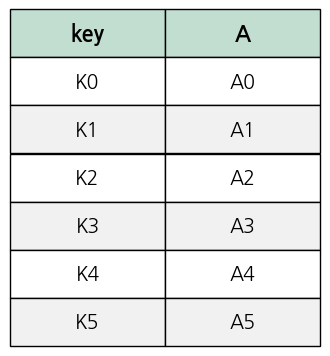

In [372]:
import six
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# matplotlib에서 한글이 안 나오는 문제 해결
NANUM = fm.FontProperties(fname=r'/Users/limyj0708/Library/Fonts/NanumGothic.ttf')
NANUM_bold = fm.FontProperties(fname=r'/Users/limyj0708/Library/Fonts/NanumGothicBold.ttf')

# centos라면 폰트 경로는 아래와 같음
 ## /usr/share/fonts/NanumFont/NanumBarunGothic.ttf
 ## /usr/share/fonts/NanumFont/NanumGothicBold.ttf

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size_header=16, font_size=14,
                     header_color='#C2DED1', row_colors=['#f1f1f2', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, align_head='center', align_cell='center', **kwargs):
    """
    align_head, align_cell : [ 'center' | 'right' | 'left' ] 
    """
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_facecolor(header_color)
            cell.set_text_props(color='black', fontproperties = NANUM_bold, fontsize=font_size_header, ha=align_head)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(fontproperties = NANUM, fontsize=font_size, ha=align_cell)
    return ax

image = render_mpl_table(caller, col_width=2.0, align_head='center')
image
image.figure.savefig("caller.png") # 이미지 저장